Osnabrück University - Machine Learning (Summer Term 2024) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Lukas Niehaus

# Exercise Sheet 07

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, June 2th, 2023**. If you need help (and Google and other resources were not enough), ask in the forum, contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's studip folder.

## Assignment 0: Math recap (Hyperplanes) [0 Points]

This exercise is supposed to be very easy and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *hyperplane*? What are the hyperlanes in $\mathbb{R}^2$ and $\mathbb{R}^3$? How are the usually described?

YOUR ANSWER HERE

**b)** What is the Hesse normal form? What is the intuition behind? What are its advantages?

YOUR ANSWER HERE

**c)** Can you transform the standard form of a hyperplane into the Hesse normal form and vice versa?

YOUR ANSWER HERE

## Assignment 1: Local PCA (7 points)

In the lecture we learned that regular PCA is ill suited for special cases of data. In this assignment we will take a look at local PCA which is used for clustered data (ML-06, Slide 25). This is mostly a repetition of algorithms we already used. Feel free to use the built-in functions for k-means clustering and PCA from the libraries (we already included the right imports to set you on track). See:
* For K-Means
    * [scipy.cluster.vq.vq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.vq.html)
    * [scipy.cluster.vq.kmeans](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans.html)
* For PCA    
    * [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
* To plot arrows
    * [matplotlib.pyplot.quiver](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html)
* Numpy
    * [@ / np.matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html#numpy.matmul)
    * [.T / np.transpose](https://numpy.org/doc/stable/reference/generated/numpy.transpose.html#numpy.transpose)

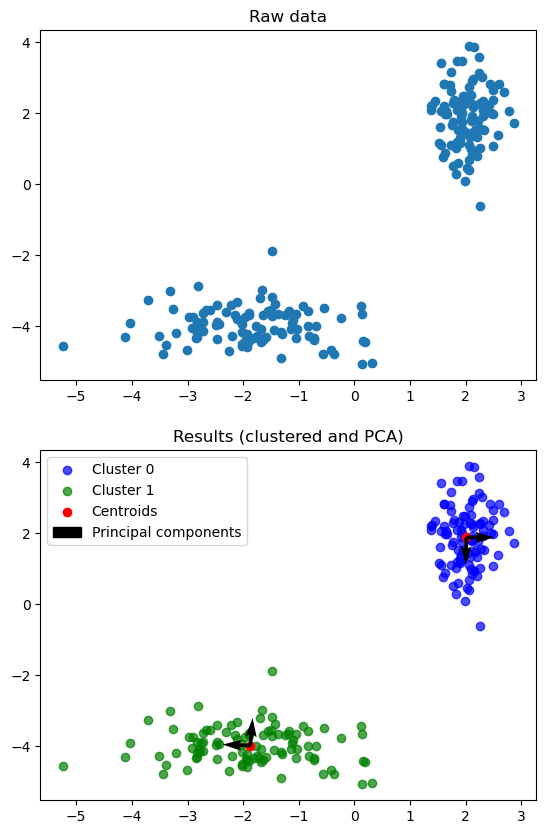

In [43]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from numpy.random import multivariate_normal as multNorm

from scipy.cluster.vq import kmeans, vq, whiten
from sklearn.decomposition import PCA

np.random.seed(42)

# Generate clustered data - you may plot the data to take a look at it
data = np.vstack((multNorm([2, 2], [[0.1, 0], [0, 1]], 100),
                  multNorm([-2, -4], [[1, 0], [0, 0.3]], 100)))

# create figure
fig, axes = plt.subplots(2)
fig.set_figheight(10)
# plot normal data
axes[0].scatter(data[:,0], data[:,1])
axes[0].set_title("Raw data")

whitened_data = data # naming remainder from experiments...

n_centroids = 2
# Apply k-means to the data.
codebook, _ = kmeans(whitened_data, n_centroids) # centroids, distortion

# create array where for each data point a label for the cluster is denoted
labels, _ = vq(whitened_data, codebook) 


data_1 = []
data_0 = []

# assign all datapoints to their clusters
for i, elem in enumerate(labels):
    if labels[i] == 0:
        data_0.append(data[i])
    elif labels[i] == 1:
        data_1.append(data[i])

data_0 = np.array(data_0)
data_1 = np.array(data_1)

# Apply PCA for each cluster and store each two largest components.
pca = PCA(n_components=2) # keep 2 components

#reduced_1 = pca.fit_transform(data_1)

comp_1 = pca.fit(data_1).components_ # eigenvecs for cluster 1

#c = pca.fit(data_1).explained_variance_ # eigevals

comp_0 = pca.fit(data_0).components_ # eigenvecs for cluster 0

#reduced_0 = pca.fit_transform(data_0)

# Plot the results of k-means and local PCA

# plot clustered data
cluster_0 = axes[1].scatter(data_0[:,0], data_0[:,1], c = "b", alpha = 0.7)
cluster_1 = axes[1].scatter(data_1[:,0], data_1[:,1], c = "g", alpha = 0.7)

# plot centroids
centroids = axes[1].scatter(codebook[:,0], codebook[:,1], c='r')

# plot principal components (largest eigenvectors)
axes[1].quiver(codebook[0][0], codebook[0][1], comp_0[0][0], comp_0[0][1], angles='xy', scale_units='xy')
axes[1].quiver(codebook[0][0], codebook[0][1], comp_0[1][0], comp_0[1][1], angles='xy', scale_units='xy')
axes[1].quiver(codebook[1][0], codebook[1][1], comp_1[0][0], comp_1[0][1], angles='xy', scale_units='xy')
axes[1].quiver(codebook[1][0], codebook[1][1], comp_1[1][0], comp_1[1][1], angles='xy', scale_units='xy')

# create object for legend
arrow = mpatches.Patch(color = "black")

# create title, legend
axes[1].set_title("Results (clustered and PCA)")
axes[1].legend(handles=[cluster_0, cluster_1, centroids, arrow], labels=["Cluster 0", "Cluster 1", "Centroids", "Principal components"])

plt.show()

## Assignment 2: Projection Pursuit (3 points)

**a)** Explain in your own words the idea of projection pursuit. Is it a linear or non-linear method for dimension reduction? Discuss why high variance, non-Gaussianness and clusters indicate an interesting feature. What is the relation to PCA? 

- idea: project the data on 2-3 dimensions (so one can simply use the eye), where data exhibit interesting structure => in a way where we can expect to find significant differences/ boundaries in the data

- non-linear => tries to find non-linear patterns in the data and makes them visible (if it were linear data, PCA would suffice since it finds the dimension(s) with the highest variance)

- high-variance => interesting because we want to be able to distinguish the datapoints, if the variance is low all datapoints are (in the worst case) on the same spot

- non-Gaussianness => if we assume that the data was generated by multiple gaussian functions/ distributions (if we have a enough datapoints this is a valid assumption due to the law of large numbers) finding non-gaussianness can indicate a possibility to differentiate between groups of data

- clusters => if there are already clusters within the data, this implies that datapoints share certain behaviours and can be grouped easily (e.g. for classification)

**b)** Explain how the different indices (Friedman-Tukey, Hermite, Natural Hermite, and Entropy) detect interesting features and discuss advantages and disadvantages.

Indices use the density distribution (P) of the projected data to find interesting features.
- Friedman-Tukey: Index is minimized, when P is a parabolic function similar to the normal distribution. So when maximized, this indicates non-Gaussianness
- Hermit/ Hall: Index is minimized if P is a standardized normal distribution. Again, if maximized it indicates non-Gaussianness
- natural Hermit: like Hermit, but higher weighting on center -> outliers and noise would probably have less influence
- entropy: minimized by standardized normal distribution as well. 

######## still need to discuss advantages/ disadvantages ##########

**c)** Explain the idea of projection pursuit for clustering (ML-06, slides 56-58). How is the index computed and why does maximizing that index yield good clusters?

YOUR ANSWER HERE

## Assignment 3: Hebbian Learning (6 points)

In the lecture (ML-07, Slides 10ff.) there is a simplified version of Ivan Pavlov's famous experiment on classical conditioning. In this exercise you will take a look into this simplified model and create your own conditionable dog with a simple Hebbian learning rule.

### a) Programming a Dog
To model the dog salivation behavior we will need to model an unconditioned and a conditioned stimulus: food and bell. They are represented as lists: `weight_food` and `weight_bell`. Note that one could just use a single number, the lists are only here to keep track of the history for a nice output. It is possible to access the current weight by selecting the last item of each list, respectively: `weight_food[-1]`.

A list of trials is already given as well as a condition database. Each entry represents an index to select from the `condition_db`. To figure out the value of the stimulus `food` in the second trial (which maps to condition `1`) one could do: `condition_db[1]["food"]`.

Your task is to implement a `for` loop over all trials. In each iteration select the correct values for $x_1$ and $x_2$ from the condition database and retrieve the current weights $w_1$ and $w_2$. Then calculate the response of the dog with the threshold $\theta$:

$$
r_t = \Theta(x_{1,t} w_{1,t-1} + x_{2,t} w_{2,t-1})\\
\Theta(x)= \begin{cases}1 \text{ if } x >= \theta\\0 \text{ else }\end{cases}
$$

With this response calculate both $w_{n,t}$ according to the Hebbian rule:

$$w_{n,t} = w_{n, t-1} + \epsilon \cdot r_t \cdot x_{n,t}$$

*Note: While you program the output might look a little messy, don't worry about it. Once you fill up all three lists properly, it will look much like on ML-07, Slide 14.*

*Hint: The [list.append()](https://docs.python.org/3/tutorial/datastructures.html) function is probably rather useful.*

In [24]:
# Initialization
condition_db = [{"food": 1, "bell": 0}, 
                {"food": 0, "bell": 1},
                {"food": 1, "bell": 1}]

trials = [0, 1, 2, 1, 2, 1, 2, 1]

epsilon = 0.2
theta = 1/2

responses = []
weight_food = [1]
weight_bell = [0]

for tri in range(len(trials)):

    # compute how much the stimuli activate the response
    rt = condition_db[trials[tri]]["food"]*weight_food[-1] + condition_db[trials[tri]]["bell"]*weight_bell[-1]

    # determine wether activation of stimuli is enough to produce a response (i.e. activation is greater than threshold theta)
    if rt > theta:
        salivation = 1
    else:
        salivation = 0

    # keep track of salivation response
    responses.append(salivation)

    # update weights of US & CS stimulus, store new weight in respective list
    weight_food.append((weight_food[-1] + epsilon * salivation * condition_db[trials[tri]]["food"]))
    weight_bell.append((weight_bell[-1] + epsilon * salivation * condition_db[trials[tri]]["bell"]))
    

# Output
print("| Food   |   |" + "|   |".join(["{:3d}".format(condition_db[trial]["food"]) for trial in trials]) + "|   |")
print("| Bell   |   |" + "|   |".join(["{:3d}".format(condition_db[trial]["bell"]) for trial in trials]) + "|   |")
print("| Saliva |   |" + "|   |".join(["{:3d}".format(response) for response in responses]) + "|   |")
print("| w_Food |" + "|   |".join(["{:3.1f}".format(w) for w in weight_food]) + "|")
print("| w_Bell |" + "|   |".join(["{:3.1f}".format(w) for w in weight_bell]) + "|")

| Food   |   |  1|   |  0|   |  1|   |  0|   |  1|   |  0|   |  1|   |  0|   |
| Bell   |   |  0|   |  1|   |  1|   |  1|   |  1|   |  1|   |  1|   |  1|   |
| Saliva |   |  1|   |  0|   |  1|   |  0|   |  1|   |  0|   |  1|   |  1|   |
| w_Food |1.0|   |1.2|   |1.2|   |1.4|   |1.4|   |1.6|   |1.6|   |1.8|   |1.8|
| w_Bell |0.0|   |0.0|   |0.0|   |0.2|   |0.2|   |0.4|   |0.4|   |0.6|   |0.8|


### b) Parameter adjustment

In the above default setting of trials (`[0, 1, 2, 1, 2, 1, 2, 1]`, in case you changed it), how many learning steps, i.e. simultaneous presentation of unconditioned and conditioned stimulus, did you need until the dog started to produce saliva on the conditioned stimulus? What happens if you change the parameters $\epsilon$ and $\theta$? Try smaller and bigger values for each or present different conditions to the dog.

With epsilon = 0.2 and theta = 0.5 it takes 3 learning steps for the dog to start producing saliva on the conditioned stimulus alone.

Adjusting epsilon and theta leads to a difference in necessary training steps. A higher epsilon speeds up learning by enabling the weight to adapt quicker. So in each step the dog learns "more" at once. A smaller epsilon on the other hand slows learning down, since the dog learns less in each step and in turn needs more learning steps to get to a response on just the conditioned stimuli.

In contrast theta doesn't impact how quickly the dog learns, but how much it has to have learned before reacting to the stimulus. A higher theta therefore leads to more learning steps before a response to the CS as well. In the worst case, if theta is too high (i.e. theta > 1 in our case) the response isn't activated even when it should be (the very first trial, to test wether our dog reacts to food with salivation) and learning is altogether impossible. At the same time, a lower theta makes less training necessary and the dog reacts after less learning steps to the CS. If theta is too small (e.g. theta < 0) the dog would simply always salivate (which dogs, not unlike babies, maybe do but thats besides the point) without actually having learned to associate the bell with food.

## Assignment 4: The Logic Perceptron (4 points)

### a) The Logic Perceptron

For the following two logical functions sketch the weights of a perceptron after it was trained. To do so, figure out when the perceptron should fire. Then come up with ideas of how you can achieve this. Remember that $w_0$, the bias, is used as a threshold and that there is a constant $x_0 = 1$. Provide the values for $w_0,w_1,w_2$ as well as some explanation.

#### 1) $(A \wedge B) \vee (\neg A \wedge B)$

YOUR ANSWER HERE

#### 2) $(A \wedge B) \vee (\neg A \wedge B) \vee (A \wedge \neg B)$

YOUR ANSWER HERE